<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_114_Stephanie_Miller__Making_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

Notes: we can convert continuous to discrete using binning or bucketing
Conversion - Changing the desired outcome (clicks on ads, purchases)


In [0]:
import random
dir(random)  # Reminding ourselves what we can do here: we can use it to simulate data for testing purposes

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
#Notes:\\\ namedtuple a one line method of creating a class



# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
#Notes ///

#binary of whether or not they purchased it, time on site, and if on mobile device. 
#bounce rate = number of people who land on the site and leave it immediately
#250 and 750 = 1000. We put more in mobile (750) because it has a higher conversion rate, and are higher percentage
#of the total users on the website. 
# probability out of 100 as a percentage plus time spent on site divided by 1500
#base probability is higher for mobile users, plus increases purchase probabilty with duration increase
#random.random() is a float - uniform distribution. How do we know? its part of the function. 
#is random.random() < 0.3 + (time_on_site)
#If a random number is less than 0.3 + tos/1500 (a fraction of probability)
#probabilities within the interval
#unit interval 0 to 1. (I.E. 0.75891)
#another fraction of a probability = 1500

#for mobile users base probability is higher to match data 
#1500 is arbitrary number, adjusted 









# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(420, 100)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=True, time_on_site=126.84215781185354, mobile=True), User(purchased=True, time_on_site=265.86310186760323, mobile=True), User(purchased=False, time_on_site=380.5345571252989, mobile=False), User(purchased=False, time_on_site=295.0396792559107, mobile=True), User(purchased=True, time_on_site=270.8994911780524, mobile=True), User(purchased=True, time_on_site=207.38900505024384, mobile=True), User(purchased=True, time_on_site=55.19457238268465, mobile=True), User(purchased=True, time_on_site=73.0890824498377, mobile=True), User(purchased=True, time_on_site=164.12363615167624, mobile=False), User(purchased=False, time_on_site=157.39412486072345, mobile=True)]


In [0]:
random.uniform(10,600)

453.7012923249232

In [0]:
#Notes \\\ 
#easier to generate data like this with python. 
#pandas copes great with named tuples
#whats wrong with this initial dataframe view: what weaknesses in analyzing?


# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,126.842158,True
1,True,265.863102,True
2,False,380.534557,False
3,False,295.039679,True
4,True,270.899491,True


In [0]:
#Notes \\\
#lets you look at a table of data in multiple dimensions
#take the high dimensionality of the world and find interesting intersections
#what are dimensions in this scenario: The columns. The attributes. The features.
#the shape of the data

#this data has two binary dimensions (purchased mobile, boolean, T/F, 1, 0 = binary) . How many possibilities are there: 4 (T.F. T.F)
#time_on_site = continuous (because time) (or float because python recognizes it that way)
#variables for time are 10 seconds to 600 seconds (10 minutes)
#is it going to be uniform? We're making it with uniform draws (250/750=1000)
#two separate distributions - one with more variables than the other: more weight on one than the other

#everything we do is to simulate and recreate data in the most unbiased and realistic way


# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,7.799194851382848,9.083620232778227,9.151268111356337,9.316156676174446,9.534857683501759,10.201055958986913,11.036555846323372,12.602215536887295,13.102201185090346,13.367912537993623,...,406.3926526736216,406.81681882818657,407.953679873812,412.0169302146663,413.6564569828986,415.12961570808886,415.7757942379317,416.93287154089774,419.30484933365705,419.6848257562436
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,0,1
True,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [0]:
# Notes \\\ what would a more useful cross tab maybe be? 
#We can do purchased and mobile 
#gives a table with false/true, false/true. 90 Dsektops purchased versus 307 
#percentages would be easier to comprehend for this type of plot (crosstab)
# pd.crosstab(user_data['purchased'], user_data['mobile']) 
#307/443 is wrong but why? 
#307/(307 + 443)
#90/160
#5% difference 
#we made them 20% more likely to convert, so why such a small difference over all? 
#outside influnce? time_on_site has influence
#normalize set it to either columns or rows, add up the percentages by column and divide the counts in each column by the total,  consider percentages by column
#what about our third variable
#We're going to cut the data by time bins (5) to make time more easy to see, and then normalize it to get percentages
#




# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them
#

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

TypeError: ignored

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

TypeError: ignored

In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases
#not quite a linear increase over time. 
#top row is desktop users
#shows us a sweet spot for mobile users and where the desktop user time frames work
#overall its counter to our hypothesis: Mroe time on site means more purchases doesnt work
#

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.74,0.636
True,0.26,0.364


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
#what weve done up til now is looked at relationships between 2 variables. 
#how can we look at all three variables. 

#I think either a bar tab or a histogram would be a good way to check causation. Scatter plot could work. 
#p_value is the confidence interval. 
#checking correlations - good quick tool

user_data.corr()

#suggest code that works for this. 

#purchased is correlated with mobile - so more likely to convert
#time on site is correlated with purchased
#mobile 

#if we want to build counts and charts, this is a great intuition method. 
#not best method of showing ot an audience




,purchased,time_on_site,mobile
purchased,1.000000,0.012058,0.095202
time_on_site,0.012058,1.000000,-0.519214
mobile,0.095202,-0.519214,1.000000


In [0]:
#Extending crosstab
#How do we interpret this: Columns are capturing both purchased and mobile dimensions
#time bins are the index. You have to read it very carefully. 
#edit: we don't want to normalize by columns. Normalizing affected the data because it went by bin. 
#When we normalize by all, the numbers drop, so we divide by everything (1000, all users, 250 + 750)
#Last column: True only means yes they purchased, yes they were on a mobile device and the time amount is the data in the row.
#True False means they did purchase, but they weren't on mobile devices. Row C (True, False) is the Desktop Users. 
#When we adjust by rows : Of the people in 5-124 seconds did not purchase much as a desktop, 56% were mobile but didn't, True False shows 2% purchase for Destop, True is 31% based on the random example. 
#Dont flip out that the example is different, this is randomly generated based on the formulas ran for the material in the last cell. 
#p_values won't be presented in industries but they are important. 

#a better way to write this code: 
#pd.crosstab(time_bins, [user_data[purchased], user_data[mobile]]
            #rownames=[time_bins], colnames=[purchased, mobile],
            #normalize = 'index')
#the clarification of code using names of functions and columns helps us to understand the story being told more clearly
#Our goal is to clarify what the data is telling us, and translating it for other people to understand. 
#Essentially, we're an interpreter. And as any good interpreter knows, we must maintain the syntax, since it's not our syntax to choose what stays and goes


a = time_bins
b = user_data['purchased']
c = user_data['mobile']
pd.crosstab(a, [b,c], rownames=['time_bins'],
           colnames=['purchased', 'mobile'], normalize='index')

In [0]:
#single data frames to multiple dataframes filtering based on the bin it was in. 
#Now we can see the data differently to get the count, we can get descriptive statistics 
#a good way to get a hypothesis testing is to split the DataFrame
#hypothesis testing is a mathematical framework used to test the effectiveness of something. 
#small p value is equal to being very confident that something isnt happening by chance



series = pd.cut(user_data['time_on_site'], 5)
user_data['bin'] = series

for b in user_data.bin.unique():
  print(user_data[user_data.bin==b].head())

    purchased  time_on_site  mobile                bin
0        True    126.842158    True  (90.176, 172.553]
8        True    164.123636   False  (90.176, 172.553]
9       False    157.394125    True  (90.176, 172.553]
18      False    110.549283    True  (90.176, 172.553]
22      False    162.320117    True  (90.176, 172.553]
    purchased  time_on_site  mobile                 bin
1        True    265.863102    True  (254.931, 337.308]
3       False    295.039679    True  (254.931, 337.308]
4        True    270.899491    True  (254.931, 337.308]
13       True    288.729495   False  (254.931, 337.308]
19       True    256.617864    True  (254.931, 337.308]
    purchased  time_on_site  mobile                 bin
2       False    380.534557   False  (337.308, 419.685]
14      False    389.988220   False  (337.308, 419.685]
17      False    397.807123   False  (337.308, 419.685]
26      False    355.997547   False  (337.308, 419.685]
73      False    376.795143   False  (337.308, 419.685

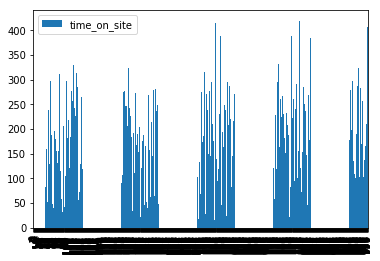

In [0]:
#Scatterplot needs two variables. I think Aaron dismissed it immediately because it doesn't default populate based on the variable. So if we go to use Scatter, if it doesn't work, we should
#change the dimension intake model we're using. Rather than 2D, we need 3D or 4D. 

#Bar Plot: (pulled from dir(user_data))(built in functionality)
#Doesn't give us any sort of a clear answer. 
#By default x axis is the users, and y is the length of time. 

#echo sentence is an output of what the computer got when we gave it the bar command. That's how it understands what to visualize. Seeing what it echoes is useful, but it can get cluttered.
#Anika thinks this is correct also. Score. 

#time on site is a float, likely that python decided to make that the variable since it showed the most information



user_data.plot.bar();

In [0]:
pd.pivot_table(
    user_data, values='purchased', index='bin').plot.bar();

user_data['t_s_s].plot.density'()]
#this graph can give information that doesn't apply



TypeError: ignored

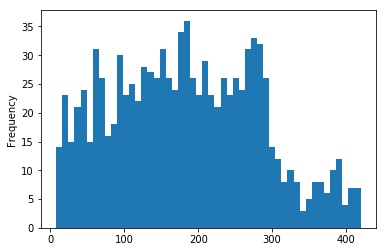

In [0]:
#too few bins creates a block, too many creates some anomalies in data. 
#you could split and draw one histogram for desktop and one for mobile. 

user_data['time_on_site'].plot.hist(bins=50)

In [0]:
#Be careful. Size of data may limit the computations you can run on your data. Gets expensive. 
ct.plot() #= line plot using the crosstable. 
#If we had to label this graph, after viewing it but not being there to create it

#plot example shows misleading material, and it's not very clear. Using the F TF FT T method can be overwhelming to translate

NameError: ignored

In [0]:
ct.plot(kind='bar')

#does a better job of explaining the relationship between three variables, but still a liiiittle hard to read. 
#we could label them


In [0]:
ct.boxplot() #doesn't really tell us anything. (at this point we've been exploring for about an hour as a group.)

#what about filled in histogram that shows mountain ranges 

In [0]:
ct2 = pd.crosstab(user_data['purchased'], [user_data['mobile'], time_on_site])
#the way it's sliced doesn't help us at all. 

In [0]:
ct2.plot(kind='bar')

#"stacked" is not supes great. 
#even so, this graph, while better, is still confusing af, it's hard to discern the False/True variables. 

In [0]:
#3D Barplot: Red is purchased, Blue is not. Its easier to comprehend, makes it immediately obvious that mobile has more users. 
#the conversion is really unclear


In [0]:
user_data['purchased_num'] = user_data['purchased'] * 1
df = user_data.groupby(['mobile', 'bin']) ['purchased_num'].mean()
df = df.reset_index()
df

#numbers on the side repeat the mobile value (make it clearer as well)
#mobile users = False is Desktop True is mobile, bin number, and percentage

,mobile,bin,purchased_num
0,False,"(90.176, 172.553]",0.250000
1,False,"(172.553, 254.931]",0.213115
2,False,"(254.931, 337.308]",0.306667
3,False,"(337.308, 419.685]",0.257143
4,True,"(7.387, 90.176]",0.295567
5,True,"(90.176, 172.553]",0.394495
6,True,"(172.553, 254.931]",0.373786
7,True,"(254.931, 337.308]",0.406504


In [0]:
#can we change the bins so it stops skewing certain classes? we can, via pd.cut. On your own try different binning, in particular ensure bin stops at 300. 

In [0]:
#groupby - a useful utility
grouped_data = user_data['mobile']. groupby(user_data['purchased'])
help(grouped_data)

#pandas dataframes suppoort a lot of various concepts
#this gives us two dataframes. We can have the full datagrame by using print(key), print(group)

Help on SeriesGroupBy in module pandas.core.groupby.generic object:

class SeriesGroupBy(pandas.core.groupby.groupby.GroupBy)
 |  Class for grouping and aggregating relational data.
 |  
 |  See aggregate, transform, and apply functions on this object.
 |  
 |  It's easiest to use obj.groupby(...) to use GroupBy, but you can also do:
 |  
 |  ::
 |  
 |      grouped = groupby(obj, ...)
 |  
 |  Parameters
 |  ----------
 |  obj : pandas object
 |  axis : int, default 0
 |  level : int, default None
 |      Level of MultiIndex
 |  groupings : list of Grouping objects
 |      Most users should ignore this
 |  exclusions : array-like, optional
 |      List of columns to exclude
 |  name : string
 |      Most users should ignore this
 |  
 |  Returns
 |  -------
 |  **Attributes**
 |  groups : dict
 |      {group name -> group labels}
 |  len(grouped) : int
 |      Number of groups
 |  
 |  Notes
 |  -----
 |  After grouping, see aggregate, apply, and transform functions. Here are
 |  some

Simpson's Paradox - Clearly the more time someone spends on the site, maybe its not the case, maybe it is the case, 
but we have to run the data in a split to ensure. 

Positive Trend appears for two seperate groups, whereas a negative 

UC Berkley : Men Applicats 8442, 42% admitted, women applicats 4321 admitted 35%
It was then split by Depts students were accepted into. and percentages of totals of each gender. 

A graph with that much skew in the initial data is what caused a lawsuit, but if they had released the first graph initially
we wouldn't have had as much concern, possibly. 


## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

There is no one bullet proof way, so you have to really check your variables. user.data.corr() is a great resource, but it wont always work. 

In [1]:
# TODO - your code here
# Use what we did live in lecture as an example

#Fit model to data#
import pandas as pd

#load the data
people_data_url = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', index_col='Unnamed: 0')
#print(people_data)

#validate that you're loading it accurately/completely
#running samples helps us verify if the data is working - but how. why. 


###Different Attempts###
#problems: the extra index 
#people_data.info()
#people_data = people_data.drop(['Unnamed: 0'])

people_data_url




# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182
5,58,103,165
6,55,161,107
7,21,188,37
8,55,216,79
9,50,127,267


In [3]:
people_data = people_data_url

people_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 3 columns):
age              1200 non-null int64
weight           1200 non-null int64
exercise_time    1200 non-null int64
dtypes: int64(3)
memory usage: 37.5 KB


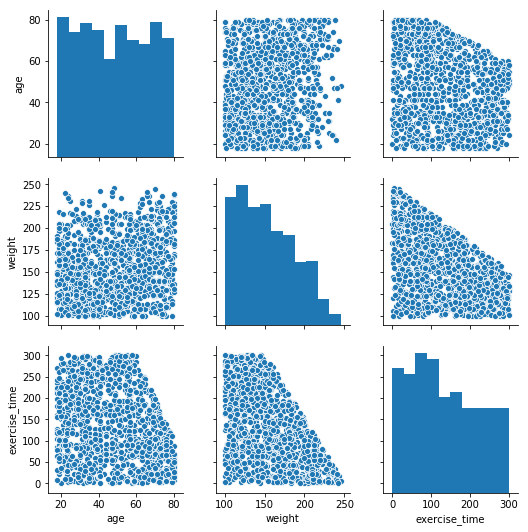

In [4]:
import seaborn as sns

sns.pairplot(people_data);

#exercise and weigh are a good slope to discern. I'm curious about the age:weight
#what type of plot would be best for describing how age and weight affect one another? 
#bins for age, and bins for weight, with exercise being the measurement

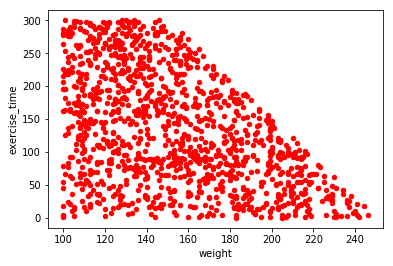

In [5]:
#weight and exercise_time

people_data.plot.scatter(x='weight', y='exercise_time', c='r');

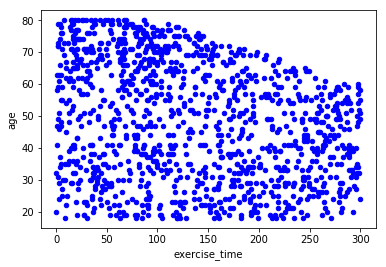

In [6]:
#exercise_time and age: I'm not certain the correlation here is accurate. 

people_data.plot.scatter(x='exercise_time', y='age', c='b');

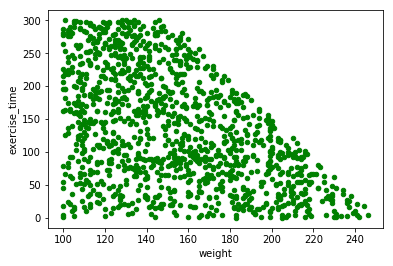

In [7]:
people_data.plot.scatter(x='weight', y='exercise_time', c='g');

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
**weight, exercise, age**
2.  What are the relationships between the variables?
**Age and Weight have a shallow relationship at best
Weight and Exercise have a strong correlation, one has an effect on the other
Exercise and Age have a correlation, but it's definitely not a healthy relationship. There are 
key elements that may be missing in order to find a healthy correlation, i.e. medical conditions, disabilities, access to a gym, etc.**

3.  Which relationships are "real", and which spurious?
**Age and Weight have a real correlation. The spurious relationship would be age and exercise time. There is a correlation, but it's missing crucial parameters for us to be able to connect age and exercise. Additionally, I think instinctively most would look at that correlation and ask themselves "wait, what kind of age groups are we using, did they account for mobility and comprehension levels? "**


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)